In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [4]:
Ojob= pd.read_csv('C:\\Users\\Harsh\\Downloads\\DSA Capstone Project\\Text Mining - Online Job Postings\\data job posts.csv')

In [5]:
Ojob.head(2)

jobpost         date  \
0  AMERIA Investment Consulting Company\nJOB TITL...  Jan 5, 2004   
1  International Research & Exchanges Board (IREX...  Jan 7, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   

                                           Company AnnouncementCode Term  \
0             AMERIA Investment Consulting Company              NaN  NaN   
1  International Research & Exchanges Board (IREX)              NaN  NaN   

  Eligibility Audience StartDate  Duration  ...   Salary  \
0         NaN      NaN       NaN       NaN  ...      NaN   
1         NaN      NaN       NaN  3 months  ...      NaN   

                                        ApplicationP OpeningDate  \
0  To apply for this position, please submit a\nc...         NaN   
1  Please submit a cover letter and resume to:\nI...         NaN   

          Deadline Notes                                             AboutC  \
0  26 January 2004   NaN                                                NaN   
1  12 January 2004   NaN  The International Research & Exchanges Board (...   

  Attach  Year Month     IT  
0    NaN  2004     1  False  
1    NaN  2004     1  False  

[2 rows x 24 columns]

In [6]:
Ojob.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [7]:
Ojob.shape

(19001, 24)

In [8]:
Online_Job = Ojob[['jobpost','Title','JobDescription', 'JobRequirment','RequiredQual','Year', 'Month', 'IT']]

In [9]:
Online_Job.shape

(19001, 8)

In [10]:
Online_Job.drop_duplicates(subset=['jobpost', 'Title'], keep=False,inplace=True)

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
Online_Job.shape

(18819, 8)

In [14]:
Online_Job.isnull().sum().any()



True

In [15]:
Online_Job.isnull().sum().sum()



6696

In [16]:
Online_Job.head(2)

jobpost  \
0  AMERIA Investment Consulting Company\nJOB TITL...   
1  International Research & Exchanges Board (IREX...   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   

                                      JobDescription  \
0  AMERIA Investment Consulting Company is seekin...   
1                                                NaN   

                                       JobRequirment  \
0  - Supervises financial management and administ...   
1                                                NaN   

                                        RequiredQual  Year  Month     IT  
0  To perform this job successfully, an\nindividu...  2004      1  False  
1  - Bachelor's Degree; Master's is preferred;\n-...  2004      1  False

In [17]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')



In [19]:
Online_Job['length'] = Online_Job['jobpost'].apply(lambda x: len([x for x in x.split()]))
Online_Job[['jobpost','length']].head()

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


jobpost  length
0  AMERIA Investment Consulting Company\nJOB TITL...     840
1  International Research & Exchanges Board (IREX...     368
2  Caucasus Environmental NGO Network (CENN)\nJOB...     301
3  Manoff Group\nJOB TITLE:  BCC Specialist\nPOSI...     591
4  Yerevan Brandy Company\nJOB TITLE:  Software D...     204

In [24]:
## Removing Punctuation
Online_Job['jobpost1'] = Online_Job['jobpost'].str.replace('[^\w\s]','')
Online_Job['Title1'] = Online_Job['Title'].str.replace('[^\w\s]','')
Online_Job['JobDescription1'] = Online_Job['JobDescription'].str.replace('[^\w\s]','')
Online_Job['JobRequirment1'] = Online_Job['JobRequirment'].str.replace('[^\w\s]','')
Online_Job['RequiredQual1'] = Online_Job['RequiredQual'].str.replace('[^\w\s]','')
Online_Job.head(2)

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

jobpost  \
0  AMERIA Investment Consulting Company\nJOB TITL...   
1  International Research & Exchanges Board (IREX...   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   

                                      JobDescription  \
0  AMERIA Investment Consulting Company is seekin...   
1                                                NaN   

                                       JobRequirment  \
0  - Supervises financial management and administ...   
1                                                NaN   

                                        RequiredQual  Year  Month     IT  \
0  To perform this job successfully, an\nindividu...  2004      1  False   
1  - Bachelor's Degree; Master's is preferred;\n-...  2004      1  False   

   length                                           jobpost1  \
0     840  AMERIA Investment Consulting Company\nJOB TITL...   
1     368  International Research  Exchanges Board IREX\n...   

                                              Title1  \
0                            Chief Financial Officer   
1  Fulltime Community Connections Intern paid int...   

                                     JobDescription1  \
0  AMERIA Investment Consulting Company is seekin...   
1                                                NaN   

                                      JobRequirment1  \
0   Supervises financial management and administr...   
1                                                NaN   

                                       RequiredQual1  
0  To perform this job successfully an\nindividua...  
1   Bachelors Degree Masters is preferred\n Excel...

In [23]:
Online_Job.columns

Index(['jobpost', 'Title', 'JobDescription', 'JobRequirment', 'RequiredQual',
       'Year', 'Month', 'IT', 'length', 'jobpost1'],
      dtype='object')

In [27]:
Online_Job['jobpost3'] = Online_Job['jobpost1'].apply(lambda x: x.replace('\n',' '))

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
Online_Job.isnull().sum()

jobpost               0
Title                26
JobDescription     3810
JobRequirment      2440
RequiredQual        420
Year                  0
Month                 0
IT                    0
length                0
jobpost1              0
Title1               26
JobDescription1    3810
JobRequirment1     2440
RequiredQual1       420
jobpost2              0
jobpost3              0
dtype: int64

In [34]:
Online_Job.dropna(inplace=True)

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
Online_Job.shape

(13042, 16)

In [37]:
# keeping those words which have only alphabets 
Online_Job['jobpost3'] = Online_Job['jobpost1'].apply(lambda x: ' '.join(x for x in x.split() if x.isalpha()))
Online_Job['Title3'] = Online_Job['Title1'].apply(lambda x: ' '.join(x for x in x.split() if x.isalpha()))
Online_Job['JobDescription3'] = Online_Job['JobDescription1'].apply(lambda x: ' '.join(x for x in x.split() if x.isalpha()))
Online_Job['JobRequirment3'] = Online_Job['JobRequirment1'].apply(lambda x: ' '.join(x for x in x.split() if x.isalpha()))
Online_Job['RequiredQual3'] = Online_Job['RequiredQual1'].apply(lambda x: ' '.join(x for x in x.split() if x.isalpha()))


C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [38]:
Online_Job.head(2)

jobpost                    Title  \
0  AMERIA Investment Consulting Company\nJOB TITL...  Chief Financial Officer   
2  Caucasus Environmental NGO Network (CENN)\nJOB...      Country Coordinator   

                                      JobDescription  \
0  AMERIA Investment Consulting Company is seekin...   
2  Public outreach and strengthening of a growing...   

                                       JobRequirment  \
0  - Supervises financial management and administ...   
2  - Working with the Country Director to provide...   

                                        RequiredQual  Year  Month     IT  \
0  To perform this job successfully, an\nindividu...  2004      1  False   
2  - Degree in environmentally related field, or ...  2004      1  False   

   length                                           jobpost1  \
0     840  AMERIA Investment Consulting Company\nJOB TITL...   
2     301  Caucasus Environmental NGO Network CENN\nJOB T...   

                    Title1                                    JobDescription1  \
0  Chief Financial Officer  AMERIA Investment Consulting Company is seekin...   
2      Country Coordinator  Public outreach and strengthening of a growing...   

                                      JobRequirment1  \
0   Supervises financial management and administr...   
2   Working with the Country Director to provide ...   

                                       RequiredQual1  \
0  To perform this job successfully an\nindividua...   
2   Degree in environmentally related field or 5 ...   

                                            jobpost2  \
0  AMERIA Investment Consulting Company JOB TITLE...   
2  Caucasus Environmental NGO Network CENN JOB TI...   

                                            jobpost3                   Title3  \
0  AMERIA Investment Consulting Company JOB TITLE...  Chief Financial Officer   
2  Caucasus Environmental NGO Network CENN JOB TI...      Country Coordinator   

                                     JobDescription3  \
0  AMERIA Investment Consulting Company is seekin...   
2  Public outreach and strengthening of a growing...   

                                      JobRequirment3  \
0  Supervises financial management and administra...   
2  Working with the Country Director to provide e...   

                                       RequiredQual3  
0  To perform this job successfully an individual...  
2  Degree in environmentally related field or yea...

In [39]:
### Removing stop words
stop = stopwords.words('english')
Online_Job['jobpost4'] = Online_Job['jobpost3'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Online_Job['Title4'] = Online_Job['Title3'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Online_Job['JobDescription4'] = Online_Job['JobDescription3'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Online_Job['JobRequirment4'] = Online_Job['JobRequirment3'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Online_Job['RequiredQual4'] = Online_Job['RequiredQual3'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [42]:
Online_Job.head(1)

jobpost                    Title  \
0  AMERIA Investment Consulting Company\nJOB TITL...  Chief Financial Officer   

                                      JobDescription  \
0  AMERIA Investment Consulting Company is seekin...   

                                       JobRequirment  \
0  - Supervises financial management and administ...   

                                        RequiredQual  Year  Month     IT  \
0  To perform this job successfully, an\nindividu...  2004      1  False   

   length                                           jobpost1  \
0     840  AMERIA Investment Consulting Company\nJOB TITL...   

                         ...                          \
0                        ...                           

                                            jobpost3                   Title3  \
0  AMERIA Investment Consulting Company JOB TITLE...  Chief Financial Officer   

                                     JobDescription3  \
0  AMERIA Investment Consulting Company is seekin...   

                                      JobRequirment3  \
0  Supervises financial management and administra...   

                                       RequiredQual3  \
0  To perform this job successfully an individual...   

                                            jobpost4                   Title4  \
0  AMERIA Investment Consulting Company JOB TITLE...  Chief Financial Officer   

                                     JobDescription4  \
0  AMERIA Investment Consulting Company seeking C...   

                                      JobRequirment4  \
0  Supervises financial management administrative...   

                                       RequiredQual4  
0  To perform job successfully individual must ab...  

[1 rows x 25 columns]

In [43]:
# coverting all cloumns to lower case
Online_Job['jobpost5']          = Online_Job['jobpost4'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Online_Job['Title5']            = Online_Job['Title4'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Online_Job['JobDescription5']   = Online_Job['JobDescription4'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Online_Job['JobRequirment5']    = Online_Job['JobRequirment4'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Online_Job['RequiredQual5']     = Online_Job['RequiredQual4'].apply(lambda x: " ".join(x.lower() for x in x.split()))


C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [44]:
Online_Job.head(1)

jobpost                    Title  \
0  AMERIA Investment Consulting Company\nJOB TITL...  Chief Financial Officer   

                                      JobDescription  \
0  AMERIA Investment Consulting Company is seekin...   

                                       JobRequirment  \
0  - Supervises financial management and administ...   

                                        RequiredQual  Year  Month     IT  \
0  To perform this job successfully, an\nindividu...  2004      1  False   

   length                                           jobpost1  \
0     840  AMERIA Investment Consulting Company\nJOB TITL...   

                         ...                          \
0                        ...                           

                                            jobpost4                   Title4  \
0  AMERIA Investment Consulting Company JOB TITLE...  Chief Financial Officer   

                                     JobDescription4  \
0  AMERIA Investment Consulting Company seeking C...   

                                      JobRequirment4  \
0  Supervises financial management administrative...   

                                       RequiredQual4  \
0  To perform job successfully individual must ab...   

                                            jobpost5                   Title5  \
0  ameria investment consulting company job title...  chief financial officer   

                                     JobDescription5  \
0  ameria investment consulting company seeking c...   

                                      JobRequirment5  \
0  supervises financial management administrative...   

                                       RequiredQual5  
0  to perform job successfully individual must ab...  

[1 rows x 30 columns]

In [46]:
Online_Job.columns

Index(['jobpost', 'Title', 'JobDescription', 'JobRequirment', 'RequiredQual',
       'Year', 'Month', 'IT', 'length', 'jobpost1', 'Title1',
       'JobDescription1', 'JobRequirment1', 'RequiredQual1', 'jobpost2',
       'jobpost3', 'Title3', 'JobDescription3', 'JobRequirment3',
       'RequiredQual3', 'jobpost4', 'Title4', 'JobDescription4',
       'JobRequirment4', 'RequiredQual4', 'jobpost5', 'Title5',
       'JobDescription5', 'JobRequirment5', 'RequiredQual5'],
      dtype='object')

In [45]:
# Jobpost , Title , Jobrequirement , Jobdescription , RequiredQual , Aboutc , IT , Year

In [48]:
Online_job_Token = pd.DataFrame()
Online_job_Token = Online_Job[['jobpost5', 'Title5','JobDescription5', 'JobRequirment5', 'RequiredQual5','Year','IT']]

In [50]:
Online_job_Token.head(2)

jobpost5                   Title5  \
0  ameria investment consulting company job title...  chief financial officer   
2  caucasus environmental ngo network cenn job ti...      country coordinator   

                                     JobDescription5  \
0  ameria investment consulting company seeking c...   
2  public outreach strengthening growing network ...   

                                      JobRequirment5  \
0  supervises financial management administrative...   
2  working country director provide environmental...   

                                       RequiredQual5  Year     IT  
0  to perform job successfully individual must ab...  2004  False  
2  degree environmentally related field years rel...  2004  False

In [51]:
Online_job_Token.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13042 entries, 0 to 19000
Data columns (total 7 columns):
jobpost5           13042 non-null object
Title5             13042 non-null object
JobDescription5    13042 non-null object
JobRequirment5     13042 non-null object
RequiredQual5      13042 non-null object
Year               13042 non-null int64
IT                 13042 non-null bool
dtypes: bool(1), int64(1), object(5)
memory usage: 726.0+ KB


In [53]:
## Converting IT into numeric form
Online_job_Token['IT_new'] = np.where(Online_job_Token['IT']== False, 1, 0)


C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
# Converting Year to String
Online_job_Token['Year'] = Online_job_Token.Year.astype(str)

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
Online_job_Token.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13042 entries, 0 to 19000
Data columns (total 8 columns):
jobpost5           13042 non-null object
Title5             13042 non-null object
JobDescription5    13042 non-null object
JobRequirment5     13042 non-null object
RequiredQual5      13042 non-null object
Year               13042 non-null object
IT                 13042 non-null bool
IT_new             13042 non-null int32
dtypes: bool(1), int32(1), object(6)
memory usage: 776.9+ KB


In [54]:
Online_job_Token.head(2)

jobpost5                   Title5  \
0  ameria investment consulting company job title...  chief financial officer   
2  caucasus environmental ngo network cenn job ti...      country coordinator   

                                     JobDescription5  \
0  ameria investment consulting company seeking c...   
2  public outreach strengthening growing network ...   

                                      JobRequirment5  \
0  supervises financial management administrative...   
2  working country director provide environmental...   

                                       RequiredQual5  Year     IT  IT_new  
0  to perform job successfully individual must ab...  2004  False       1  
2  degree environmentally related field years rel...  2004  False       1

In [57]:
Online_job_Token.columns

Index(['jobpost5', 'Title5', 'JobDescription5', 'JobRequirment5',
       'RequiredQual5', 'Year', 'IT', 'IT_new'],
      dtype='object')

In [96]:
# Combining all columns into one column -> col_all

Online_job_Token["col_all"] = Online_job_Token["jobpost5"].map(str) + " " + Online_job_Token["Title5"] + " " + Online_job_Token["JobDescription5"] + " " + Online_job_Token["JobRequirment5"] + " " + Online_job_Token["RequiredQual5"] + " " + Online_job_Token["Year"]



C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
Online_job_Token.reset_index(drop=True,inplace=True)

In [83]:
Online_job_Token.head(2)

jobpost5                   Title5  \
0  ameria investment consulting company job title...  chief financial officer   
1  caucasus environmental ngo network cenn job ti...      country coordinator   

                                     JobDescription5  \
0  ameria investment consulting company seeking c...   
1  public outreach strengthening growing network ...   

                                      JobRequirment5  \
0  supervises financial management administrative...   
1  working country director provide environmental...   

                                       RequiredQual5  Year     IT  IT_new  \
0  to perform job successfully individual must ab...  2004  False       1   
1  degree environmentally related field years rel...  2004  False       1   

                                             col_all  
0  ameria investment consulting company job title...  
1  caucasus environmental ngo network cenn job ti...

In [84]:
Online_job_Token.col_all.head(2)

0    ameria investment consulting company job title...
1    caucasus environmental ngo network cenn job ti...
Name: col_all, dtype: object

In [98]:
# define X and y
X = Online_job_Token.col_all
y = Online_job_Token.IT_new

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [99]:
type(X)

pandas.core.series.Series

## Lematization 

In [137]:
from textblob import Word
Online_job_Token['col_all'] = Online_job_Token['col_all'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Online_job_Token['col_all'].head()



C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    ameria investment consulting company job title chief financial officer position location yerevan armenia job description ameria investment consulting company seeking chief financial officer this position manages company fiscal administrative function provides highly responsible technically complex staff assistance executive director the work performed requires high level technical proficiency financial management investment management well management supervisory administrative skill job responsibility supervises financial management administrative staff including assigning responsibility reviewing employee work process product counseling employee giving performance evaluation recommending disciplinary action serf member management team participating strategic operational planning company directs oversees company financial management activity including establishing monitoring internal control managing cash investment managing investment portfolio collaboration investment team leade

## STop Words Removal

## Extending Stop WOrds

In [138]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


In [139]:
stop.extend(('knowledge',
'experience',
'job',
'skills',
'work',
'applicaton',
'ability',
'armenia',
'please',
'website',
'mention',
'the',
'english',
'wwwcareercenteram',
'company',
'team',
'excellent',
'good',
'armenian',
'required',
'organization',
'date',
'to',
'responsible',
'office',
'years',
'communication',
'yeveran',
'time',
'ensure',
'provide',
'letter',
'develop',
'related',
'activities',
'center',
'languages',
'responsibilites',
'degree',
'candidates',
'title'))

In [140]:
Online_job_Token['col_all'] = Online_job_Token['col_all'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Online_job_Token['col_all'].head(1)


C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    ameria investment consulting chief financial officer position location yerevan description ameria investment consulting seeking chief financial officer position manages fiscal administrative function provides highly technically complex staff assistance executive director performed requires high level technical proficiency financial management investment management well management supervisory administrative skill responsibility supervises financial management administrative staff including assigning responsibility reviewing employee process product counseling employee giving performance evaluation recommending disciplinary action serf member management participating strategic operational planning directs oversees financial management activity including establishing monitoring internal control managing cash investment managing investment portfolio collaboration investment leader includes limited evaluation investment risk concentration risk fund deployment level adequacy loss liquid

In [166]:
# define X and y
X = Online_job_Token.col_all
y = Online_job_Token.IT_new

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Tokenization 

In [167]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()

In [168]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [169]:
X_train_dtm.shape

(9781, 23926)

In [170]:
X_test_dtm.shape

(3261, 23926)

In [171]:
# last 50 features
print(vect.get_feature_names()[-50:])

['zega', 'zeitun', 'zejtun', 'zend', 'zendesk', 'zendframework', 'zendyii', 'zenni', 'zeno', 'zenta', 'zenteq', 'zentex', 'zentexam', 'zeppeilin', 'zeppelin', 'zepto', 'zepzepyur', 'zero', 'zerobalance', 'zerobased', 'zflyers', 'zhanna', 'zhannayeghiazaryan', 'zhiguly', 'zhirayr', 'zhoravor', 'zigbeelike', 'zigzag', 'zillion', 'zip', 'zipped', 'zipzip', 'zminimum', 'zn', 'zod', 'zohrabian', 'zonal', 'zone', 'zoning', 'zoo', 'zoology', 'zoom', 'zooplankton', 'zoravar', 'zrhovhannisyan', 'zte', 'ztes', 'zugdidi', 'zusammenarbeit', 'zvartnots']


In [94]:
pd.set_option('display.max_colwidth', -1)

In [105]:
Online_job_Token.col_all.head(1)

0    ameria investment consulting company job title chief financial officer position location yerevan armenia job description ameria investment consulting company seeking chief financial officer this position manages companys fiscal administrative functions provides highly responsible technically complex staff assistance executive director the work performed requires high level technical proficiency financial management investment management well management supervisory administrative skills job responsibilities supervises financial management administrative staff including assigning responsibilities reviewing employees work processes products counseling employees giving performance evaluations recommending disciplinary action serves member management team participating strategic operational planning company directs oversees companys financial management activities including establishing monitoring internal controls managing cash investments managing investment portfolio collaboration i

In [106]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Defining Functiom

In [211]:
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features Train: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    print('Features Test: ', X_test_dtm.shape[1])
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test1(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    print('Train Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    y_pred_class = nb.predict(X_test_dtm)
    print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [204]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(2,3), min_df=5)

In [212]:
# Predicting Whether Job is IT or NOn IT
tokenize_test1(vect)

Features:  123259
Train Accuracy:  0.9320110418157652
Test Accuracy:  0.9221097822753757


In [206]:
Online_job_Token.columns

Index(['jobpost5', 'Title5', 'JobDescription5', 'JobRequirment5',
       'RequiredQual5', 'Year', 'IT', 'IT_new', 'col_all'],
      dtype='object')

In [215]:
###DECIsion Tree

In [216]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [218]:
clf_tree = DecisionTreeClassifier( max_depth = 3 )
clf_tree=clf_tree.fit( X_train_dtm, y_train )

In [219]:
pd.DataFrame(clf_tree.predict_proba(X_train_dtm)).head()

0         1
0  0.052441  0.947559
1  0.052441  0.947559
2  0.052441  0.947559
3  0.052441  0.947559
4  0.940343  0.059657

In [224]:
tree_train_pred = pd.DataFrame( { 'actual':  y_train,
                            'predicted': clf_tree.predict( X_train_dtm ) } )
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test_dtm ) } )


In [221]:
tree_train_pred.head(10)

actual  predicted
4592   1       1        
6372   1       1        
12007  1       1        
2698   1       1        
12290  0       0        
11848  1       1        
7767   1       1        
4580   1       1        
11585  0       1        
7403   1       1

In [222]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.9308864124322667

In [225]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9291628334866605

Text(0.5,15,'Predicted label')

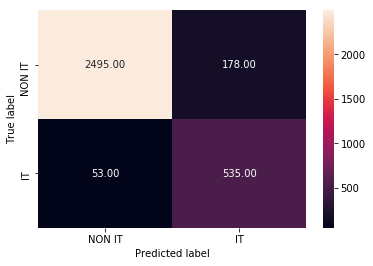

In [228]:
import seaborn as sn
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["NON IT", "IT"] , yticklabels = ["NON IT", "IT"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [230]:
#How good the model is?
predict_proba_df = pd.DataFrame( clf_tree.predict_proba( X_train_dtm ) )

In [234]:
predict_proba_df.columns= ['IT', 'NON_IT']

In [235]:
predict_proba_df.head()

IT    NON_IT
0  0.052441  0.947559
1  0.052441  0.947559
2  0.052441  0.947559
3  0.052441  0.947559
4  0.940343  0.059657

In [236]:
metrics.roc_auc_score(y_train,predict_proba_df.NON_IT )

0.8905310404499244

In [239]:
auc_score = metrics.roc_auc_score( y_train, predict_proba_df.NON_IT  )
round( float( auc_score ), 2 )

0.89

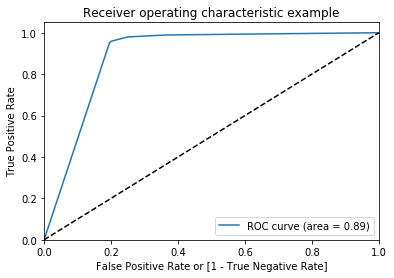

In [240]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( y_train,
                                     predict_proba_df.NON_IT,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [242]:
train_gini = 2*metrics.roc_auc_score(y_train, clf_tree.predict(X_train_dtm)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(y_test, clf_tree.predict(X_test_dtm)) - 1

print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.7299755307403673
The Gini Index for the model built on the Test Data is :  0.7295500031925595


In [244]:
train_auc = metrics.roc_auc_score(y_train, clf_tree.predict(X_train_dtm))
test_auc = metrics.roc_auc_score(y_test, clf_tree.predict(X_test_dtm))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The AUC for the model built on the Train Data is :  0.8649877653701836
The AUC for the model built on the Test Data is :  0.8647750015962797


In [113]:
X_train_tokens = vect.get_feature_names()

In [114]:
X_train_tokens

['2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 'aaas',
 'aarhus',
 'aas',
 'ab',
 'abandoned',
 'abekchya',
 'abelyan',
 'abide',
 'abilities',
 'ability',
 'able',
 'about',
 'above',
 'abovelisted',
 'abovementioned',
 'abovian',
 'abovyan',
 'abrahamian',
 'abrahamyan',
 'abreast',
 'abroad',
 'absade',
 'absence',
 'absent',
 'absolute',
 'absorb',
 'abstract',
 'abt',
 'abuse',
 'ac',
 'academia',
 'academic',
 'academics',
 'academy',
 'acbacredit',
 'acca',
 'accacpa',
 'accelerate',
 'accelerating',
 'acceleration',
 'accelerator',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessed',
 'accesses',
 'accessibility',
 'accessible',
 'accessing',
 'accessories',
 'accident',
 'accidents',
 'accommodate',
 'accommodation',
 'accommodations',
 'accompanied',
 'accompany',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishing',
 'accomplishment',
 'accomplishments',
 'accont

### Lemmatization

In [115]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
   # text = unicode(text, 'utf-8').lower()
    words = TextBlob(text).words
    return [word.lemmatize(pos='v') for word in words]

In [124]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features Train:  23625
Features Test:  23625


In [118]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [123]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

### Extension of Stop words

In [127]:
freq = pd.Series(' '.join(Online_job_Token['col_all']).split()).value_counts()[:50]
freq

knowledge            55954
experience           55672
job                  55267
skills               49495
work                 48971
application          46885
ability              36061
development          35916
armenia              34228
please               29080
website              28904
mention              28551
the                  28515
management           27036
project              26746
english              26509
wwwcareercenteram    25900
company              25426
team                 23177
excellent            22205
good                 21875
armenian             21572
procedures           21524
software             21080
required             20949
organization         20478
date                 20231
to                   19270
responsible          19044
office               18788
years                18499
communication        18273
yerevan              18158
time                 17269
ensure               17159
provide              17148
letter               17021
d

In [132]:
stop.extend(('knowledge',
'experience',
'job',
'skills',
'work',
'applicaton',
'ability',
'armenia',
'please',
'website',
'mention',
'the',
'english',
'wwwcareercenteram',
'company',
'team',
'excellent',
'good',
'armenian',
'required',
'organization',
'date',
'to',
'responsible',
'office',
'years',
'communication',
'yeveran',
'time',
'ensure',
'provide',
'letter',
'develop',
'related',
'activities',
'center',
'languages',
'responsibilites',
'degree',
'candidates',
'title'))

In [199]:
vect = TfidfVectorizer(analyzer=split_into_lemmas, ngram_range=(2,3), min_df=5, max_features=1200, stop_words='english')
tokenize_test1(vect)

KeyboardInterrupt: 

In [ ]:
train_gini = 2*metrics.roc_auc_score(Network_Train_final['attack_new'], result.predict(Network_Train_final)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Network_Test_final['attack_new'], result.predict(Network_Test_final)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

## Bigrams

In [151]:
from nltk.util import bigrams, trigrams
from itertools import chain


In [156]:
tokensPerTitle = [nltk.word_tokenize(title) for title in Online_job_Token.col_all]
print(tokensPerTitle)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [157]:
symbols = {"``", "''", ":"}
tokensPerTitle = [[token.lower() for token in t if token.lower() not in symbols and token.lower() not in stoplist] for t in tokensPerTitle]

In [158]:
tokensPerTitle

[['ameria',
  'investment',
  'consulting',
  'chief',
  'financial',
  'officer',
  'position',
  'location',
  'yerevan',
  'description',
  'ameria',
  'investment',
  'consulting',
  'seeking',
  'chief',
  'financial',
  'officer',
  'position',
  'manages',
  'fiscal',
  'administrative',
  'function',
  'provides',
  'highly',
  'technically',
  'complex',
  'staff',
  'assistance',
  'executive',
  'director',
  'performed',
  'requires',
  'high',
  'level',
  'technical',
  'proficiency',
  'financial',
  'management',
  'investment',
  'management',
  'well',
  'management',
  'supervisory',
  'administrative',
  'skill',
  'responsibility',
  'supervises',
  'financial',
  'management',
  'administrative',
  'staff',
  'including',
  'assigning',
  'responsibility',
  'reviewing',
  'employee',
  'process',
  'product',
  'counseling',
  'employee',
  'giving',
  'performance',
  'evaluation',
  'recommending',
  'disciplinary',
  'action',
  'serf',
  'member',
  'manageme

In [159]:
b = list(chain(*[(list(bigrams(tokens))) for tokens in tokensPerTitle]))

In [160]:
b

[('ameria', 'investment'),
 ('investment', 'consulting'),
 ('consulting', 'chief'),
 ('chief', 'financial'),
 ('financial', 'officer'),
 ('officer', 'position'),
 ('position', 'location'),
 ('location', 'yerevan'),
 ('yerevan', 'description'),
 ('description', 'ameria'),
 ('ameria', 'investment'),
 ('investment', 'consulting'),
 ('consulting', 'seeking'),
 ('seeking', 'chief'),
 ('chief', 'financial'),
 ('financial', 'officer'),
 ('officer', 'position'),
 ('position', 'manages'),
 ('manages', 'fiscal'),
 ('fiscal', 'administrative'),
 ('administrative', 'function'),
 ('function', 'provides'),
 ('provides', 'highly'),
 ('highly', 'technically'),
 ('technically', 'complex'),
 ('complex', 'staff'),
 ('staff', 'assistance'),
 ('assistance', 'executive'),
 ('executive', 'director'),
 ('director', 'performed'),
 ('performed', 'requires'),
 ('requires', 'high'),
 ('high', 'level'),
 ('level', 'technical'),
 ('technical', 'proficiency'),
 ('proficiency', 'financial'),
 ('financial', 'managemen

##  Term Frequency-Inverse Document Frequency (TF-IDF)

In [184]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(analyzer=split_into_lemmas,min_df=5,stop_words='english')
dtm = vect.fit_transform(Online_job_Token.JobDescription5)
features = vect.get_feature_names()
dtm.shape

(13042, 3838)

In [198]:
len(vect.get_feature_names())

3838

In [196]:
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names()).head()

a  aarhus   ab  abilities  ability  able  about  abovementioned  abovian  \
0  0.0  0.0     0.0  0.0        0.0      0.0   0.0    0.0             0.0       
1  0.0  0.0     0.0  0.0        0.0      0.0   0.0    0.0             0.0       
2  0.0  0.0     0.0  0.0        0.0      0.0   0.0    0.0             0.0       
3  0.0  0.0     0.0  0.0        0.0      0.0   0.0    0.0             0.0       
4  0.0  0.0     0.0  0.0        0.0      0.0   0.0    0.0             0.0       

   abovyan    ...      yerevan  yes  yet  you  young  youth  zeppelin  zone  \
0  0.0        ...      0.0      0.0  0.0  0.0  0.0    0.0    0.0       0.0    
1  0.0        ...      0.0      0.0  0.0  0.0  0.0    0.0    0.0       0.0    
2  0.0        ...      0.0      0.0  0.0  0.0  0.0    0.0    0.0       0.0    
3  0.0        ...      0.0      0.0  0.0  0.0  0.0    0.0    0.0       0.0    
4  0.0        ...      0.0      0.0  0.0  0.0  0.0    0.0    0.0       0.0    

   zte  zvartnots  
0  0.0  0.0        
1  0.0  0.0        
2  0.0  0.0        
3  0.0  0.0        
4  0.0  0.0        

[5 rows x 3838 columns]

In [189]:
Online_job_Token.columns

Index(['jobpost5', 'Title5', 'JobDescription5', 'JobRequirment5',
       'RequiredQual5', 'Year', 'IT', 'IT_new', 'col_all'],
      dtype='object')

In [190]:
# jobpost
#Title
#Jobrequirement
#requiredqual
#aboutc
#it
#year
Job_posting_new = pd.DataFrame()
Job_posting_new = Online_job_Token[['jobpost5', 'Title5', 'JobDescription5', 'JobRequirment5','RequiredQual5','Year','IT_new',]]

In [191]:
def summarize():
    
    # choose a random Jobdescription that is at least 500 characters
    Job_length = 0
    while Job_length < 500:
        Job_id = np.random.randint(0, len(Job_posting_new))
        #review_text = unicode(yelp.text[review_id], 'utf-8')
        JobD_text = Job_posting_new.JobDescription5[Job_id]
        JobD_length = len(Job_posting_new.JobDescription5[Job_id])
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(JobD_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[Job_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
    
    # print 5 random words
    print('\n' + 'RANDOM WORDS:')
    #random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    random_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word in random_words:
        print(word)
    
    # print the review
    print('\n' + JobD_text)

In [192]:
summarize()

KeyboardInterrupt: 

### Word Cloud

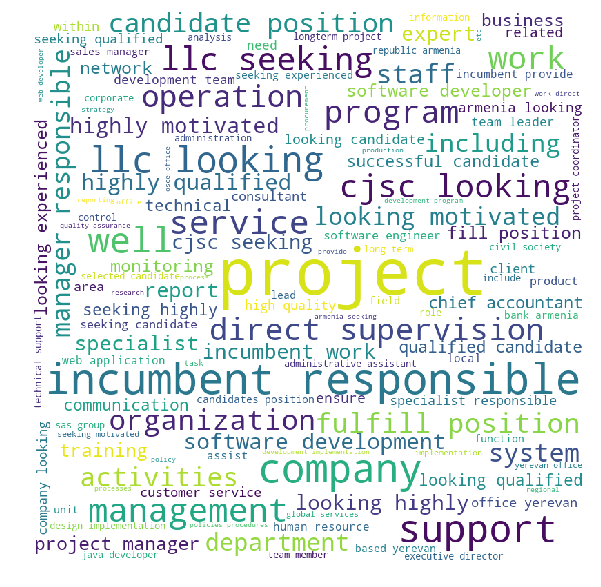

In [181]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in Online_job_Token.JobDescription5: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 